In [1]:
import gseapy as gp
human = gp.get_library_name(organism='Human')

# for geneset_library in human:
#     if "hallmark" in geneset_library.lower():
#         print(geneset_library)

# library = gp.get_library(name="GO_Biological_Process_2025", organism="Human")
# print(library.keys())

In [2]:
print(human)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'COMPARTMENTS_Curated_2025', 'COMPARTMENTS_Experimental_2025', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_C

In [19]:
import pandas as pd
df = pd.read_csv("sample_corr_score_table_TIM.csv")
df = df.dropna()

In [20]:
df
df.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)
df.set_index('Gene', inplace=True)

In [22]:
expression = df
expression

,4.0_4_corr,4.0_4_pval,4.0_4_qval,4.0_4_ci_low,4.0_4_ci_high
Gene,,,,,
C19orf77,0.513082,0.000000e+00,0.000000e+00,0.499641,0.526275
PRSS57,0.503943,0.000000e+00,0.000000e+00,0.490335,0.517305
IGLL1,0.466397,0.000000e+00,0.000000e+00,0.452135,0.480421
MPO,0.452515,0.000000e+00,0.000000e+00,0.438024,0.466772
PRTN3,0.435356,0.000000e+00,0.000000e+00,0.420592,0.449890
...,...,...,...,...,...
RNASE1,-0.276521,4.240000e-208,5.310000e-206,-0.293130,-0.259745
MMP9,-0.286623,2.500000e-224,3.460000e-222,-0.303127,-0.269948
ACP5,-0.303718,1.900000e-253,2.770000e-251,-0.320035,-0.287221


In [27]:
import numpy as np
# Create a ranking metric - here using the difference between c4 and c1 averages
# expression['ranking_metric'] = expression['4.0_4_corr'] * (-np.log10(expression['4.0_4_qval']))
expression['ranking_metric'] = expression['4.0_4_corr']

# Rank genes by this metric
ranking = expression[['ranking_metric']]
ranking = ranking.sort_values(by='ranking_metric', ascending=False)

# Convert to the format gseapy expects (index = gene names, column = ranking)
ranking = ranking.rename_axis("gene").reset_index()

In [28]:
ranking

,gene,ranking_metric
0,C19orf77,0.513082
1,PRSS57,0.503943
2,IGLL1,0.466397
3,MPO,0.452515
4,PRTN3,0.435356
...,...,...
1151,RNASE1,-0.276521
1152,MMP9,-0.286623
1153,ACP5,-0.303718
1154,APOC1,-0.313474


2025-07-17 10:17:05,991 [WARNING] Duplicated values found in preranked stats: 0.26% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Term,tag %,gene %,fdr,es,nes,lead_genes
0,SGC0946 & I-BET MV4-11 GSE71777 down,24/54,8.65%,0.000000,0.727184,2.691249,PRSS57;PRTN3;AZU1;CTSG;MS4A3;NUCB2;MYB;PLAC8;CLEC11A;TOP2A;MKI67;H2AFZ;HSPD1;GAPDH;HSP90AA1;FAM101B;EMB;TUBA1B;KBTBD11;HSP90AB1;SLC44A1;P2RY8;RAB27A;CALR
1,IRF1 Primary bone marrow-derived macrophages (BMDM) Knockout GSE77885 up,45/89,23.70%,0.000000,-0.503692,-2.184098,C1QC;C1QB;CTSS;CTSB;DAB2;SAT1;KLF6;IFITM3;MARCKS;CCL2;SDCBP;ITGAV;MAF;FGL2;ATF3;C3AR1;TXNIP;CYBB;CD83;ID2;ZFP36;JUNB;NAMPT;ANPEP;RASGEF1B;CDKN1A;CCL4;CCR1;JUN;ICAM1;SIGLEC1;SDC3;SOD2;MPEG1;CREM;TNFAIP2;TPST1;LFNG;PLAUR;TRPS1;PICALM;BACH1;GK;CDC42EP2;SOCS3
2,GW3965 Tumor GSE66539 up,30/60,14.27%,0.000000,-0.562674,-2.242732,ACP5;RNASE1;GPNMB;CTSK;CST3;LMNA;FN1;CTSS;CTSB;ZFP36L1;DAB2;SAT1;SDC2;SGK1;HLA-DPA1;SDCBP;ITGAV;IGFBP6;FGL2;TXNIP;GLUL;HLA-DQB1;MT-ND1;LGALS1;MT-ND3;SPARC;HLA-DPB1;MT-ND2;ITGAX;CYP27A1
3,Salmonella typhimurium Macrophage 18hr GSE67427 up,72/134,22.15%,0.000000,-0.554239,-2.445861,CTSL;CTSK;MMP14;MMP19;CTSS;CD163;SAT1;CXCL3;IFITM3;MARCKS;CCL3;SLC16A10;CD14;SDCBP;OLR1;ITGAV;SLC11A1;C3AR1;TXNIP;RAB13;SLC1A3;TNFRSF1B;CXCL2;CLEC4E;SERPINA1;VMP1;CCL4L2;JUNB;NAMPT;ANPEP;GLUL;SLC43A2;PFKFB3;RNF149;PLA2G7;DUSP1;AQP9;CDKN1A;CCL4;ICAM1;CD300E;TNFAIP3;ELL2;CXCL1;SIGLEC1;BCL2A1;SOD2;RGS2;MT1G;DDIT4;ADM;SERPINB9;DMXL2;UPP1;PTAFR;C2;IER3;IFNGR2;TNFAIP2;NFKBIA;RNF144B;FAM26F;HIST1H2AC;TBC1D9;CDC42SE1;PLAUR;OGFRL1;IFI6;PICALM;TREM1;TIMP1;GK
4,BRD4 HCT116 knockdown GSE73317 down,21/47,10.47%,0.000000,0.601694,2.258140,STMN1;MGST1;HMGB2;HSPB1;H2AFZ;HSPD1;GAPDH;HSPA1B;HSP90AA1;HSPH1;HSPE1;DNAJB1;TUBA1B;FABP5;HNRNPH1;HSP90AB1;UBB;CALR;SMCHD1;EREG;BAG3
5,heat-inactivated MTB H37Rv Macrophage 4hr GSE67427 down,60/110,20.33%,0.000000,-0.607993,-2.718369,SPP1;APOC1;ACP5;MMP9;APOE;GPNMB;TYROBP;CST3;CD9;FCGR3A;C1QC;LMNA;C1QA;MMP14;C1QB;MAFB;FN1;MS4A7;PLTP;ZFP36L1;CXCL16;SAT1;MSR1;MARCKS;HMOX1;DUSP6;NPL;TMEM176B;HLA-DPA1;CD14;OLR1;C5AR1;SLC11A1;LHFPL2;MARCO;CYBB;HLA-DQA1;ID2;SERPINA1;SLC43A2;HLA-DQB1;STAB1;LGALS1;SPARC;HLA-DPB1;CYP27A1;HLA-DRB5;MT1G;MPEG1;DMXL2;SLC15A3;SLC6A6;IFNGR2;AGAP3;HLA-DRB1;RAP2B;SPI1;CLEC5A;TBC1D9;FAM198B
6,Mycobacterium tuberculosis (MTB) H37Rv Macrophage 48hr GSE67427 down,38/82,14.27%,0.000000,-0.569810,-2.394350,SPP1;APOC1;ACP5;RNASE1;APOE;GPNMB;TYROBP;CTSK;CST3;CKB;CD9;CD68;C1QC;LMNA;LGMN;C1QA;FN1;TREM2;PLTP;DAB2;SAT1;PLD3;HMOX1;NPL;HLA-DPA1;TNFRSF1B;NUPR1;CD52;CSTB;LIPA;MT-ND1;STAB1;LGALS1;MT-ND3;HLA-DPB1;MT-ND2;ITGAX;CYP27A1
7,IL-13 Small intestine (Nod2 knockout) 25ug GSE76504 up,24/42,23.88%,0.000000,-0.556644,-2.112328,APOE;CKB;LMNA;FN1;KLF6;DUSP6;SDCBP;FGL2;ATF3;BIRC3;JUNB;RASGEF1B;SLC43A2;MT-ND1;KLF4;EXT1;PELI1;MPEG1;UPP1;JMJD1C;BACH1;INSIG1;SOCS3;CREBRF
8,Obesity Omental adipose tissue GSE55008 up,39/80,15.57%,0.000000,-0.635586,-2.540976,SPP1;RNASE1;GPNMB;CST3;CD68;FCGR3A;C1QC;VSIG4;LMNA;LGMN;C1QA;MMP14;C1QB;MS4A7;CTSS;CD163;PLTP;CTSB;DAB2;MSR1;PLD3;PLIN2;HLA-DPA1;CD14;MAF;MARCO;CYBB;FOLR2;PFKFB3;LIPA;MT-ND1;LGALS1;SIGLEC1;SPARC;HLA-DPB1;MT-ND2;HLA-DRB5;CD36;MPEG1
9,N-acetylcysteine K-RAS-induced lung tumor GSE52594 down,27/53,18.34%,0.000000,-0.550091,-2.145044,SPP1;APOE;CTSL;CST3;C1QA;CTSS;PLTP;CXCL16;KLF6;IFITM3;MARCKS;TMEM176B;TSC22D3;SDCBP;FGL2;TMEM176A;CRIP1;CD52;GLUL;JUN;SPARC;MPEG1;SERPINB9;THBD;KLF2;ITPRIPL2;NFKBIA


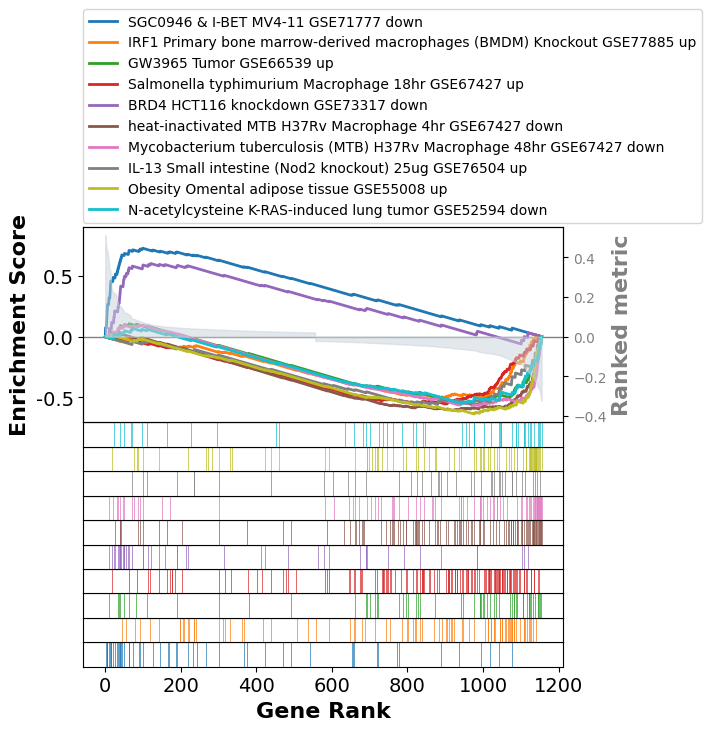

In [33]:
from IPython.display import display, HTML

# Path to the gene sets file
gmt_file = "RNA-Seq_Disease_Gene_and_Drug_Signatures_from_GEO"  # Update path as needed

pre_res = gp.prerank(rnk = ranking,
                     gene_sets=gmt_file, # kegg is a dict object
                     seed = 6, permutation_num = 100)

# gene_sets=["data/bp_2024.gmt", "data/cc_2024.gmt", "data/mf_2024.gmt", "data/hallmark_2024.gmt", "data/onc_2024.gmt", "data/im_2024.gmt"], # kegg is a dict object

out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['tag %'],
               pre_res.results[term]['gene %'],
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes'],
               pre_res.results[term]['lead_genes']])

out_df = pd.DataFrame(out, columns = ['Term', 'tag %', 'gene %', 'fdr', 'es', 'nes', 'lead_genes']).sort_values('fdr').reset_index(drop = True)
# display(HTML(out_df.to_html()))

axs = pre_res.plot(out_df['Term'][0:10],
                   #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(3,4)
                  )

# display(HTML(out_df.to_html()))        ### uncomment if you want gene sets in tabular format

